# EDA

## Loading data

In [62]:
import pandas as pd
import pycountry_convert as pc
import pycountry
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
#import skfda
#import skfda.preprocessing.smoothing.kernel_smoothers as ks

pd.options.display.max_columns = None
pd.options.display.max_colwidth = None

## PENN

In [2]:
data_penn = pd.read_excel('data/penn/pwt100.xlsx', sheet_name='Data')

In [3]:
data_penn.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,cgdpo,cn,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,i_cig,i_xm,i_xr,i_outlier,i_irr,cor_exp,statcap,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_penn = data_penn.drop('currency_unit', axis=1)

In [5]:
# pc.map_countries() # dict with codes for all countries

In [6]:
alpha2 = pd.DataFrame([pc.country_alpha3_to_country_alpha2(code) for code in data_penn.countrycode], columns = ['code'])
alpha2.loc[alpha2.code=="SX", 'code'] = 'MF' # dutch part to french

In [7]:
continents = pd.DataFrame([pc.country_alpha2_to_continent_code(code) for code in alpha2.code], columns=['continent'])

In [8]:
data_penn_europe = data_penn[continents.continent == 'EU'] # filtering europe

In [9]:
data_penn_europe.shape

(2730, 51)

In [10]:
data_penn_europe.head()

,countrycode,country,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,cgdpo,cn,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,i_cig,i_xm,i_xr,i_outlier,i_irr,cor_exp,statcap,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
210,ALB,Albania,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,ALB,Albania,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,ALB,Albania,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,ALB,Albania,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,ALB,Albania,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# data_penn_europe.to_csv('data/penn/data_penn_europe.csv')

In [12]:
print(sorted(data_penn_europe.country.unique()))

['Albania', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Republic of Moldova', 'Romania', 'Russian Federation', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom']


In [13]:
len(data_penn_europe.country.unique())

39

## Missing values

In [14]:
# missing values
total = data_penn_europe.isna().sum().sort_values(ascending=False) # how many missings in each column
percent = (data_penn_europe.isna().sum()/data_penn_europe.isna().count()).round(4).sort_values(ascending=False) # in %
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data.rename_axis('Column').reset_index()
missing_data

,Column,Total,Percent
0,statcap,2509,0.9190
1,cor_exp,2327,0.8524
2,avh,1155,0.4231
3,rwtfpna,1001,0.3667
4,rtfpna,1001,0.3667
5,cwtfp,1001,0.3667
6,ctfp,1001,0.3667
7,pl_k,923,0.3381
8,ck,923,0.3381
9,rkna,923,0.3381


In [15]:
# missing values older then 1990
total_1990 = data_penn_europe[data_penn_europe['year'] >= 1990].isna().sum().sort_values(ascending=False) # how many missings in each column
percent_1990 = (data_penn_europe[data_penn_europe['year'] >= 1990].isna().sum()/data_penn_europe[data_penn_europe['year'] >= 1990].isna().count()).round(4).sort_values(ascending=False) # in %
missing_data_1990 = pd.concat([total_1990, percent_1990], axis=1, keys=['Total', 'Percent'])
missing_data_1990 = missing_data_1990.rename_axis('Column').reset_index()
missing_data_1990


,Column,Total,Percent
0,statcap,949,0.8111
1,cor_exp,823,0.7034
2,avh,289,0.2470
3,rwtfpna,194,0.1658
4,rtfpna,194,0.1658
5,cwtfp,194,0.1658
6,ctfp,194,0.1658
7,hc,120,0.1026
8,pl_k,116,0.0991
9,ck,116,0.0991


In [16]:
# variables meaning
# exp = pd.read_excel('data/penn/pwt100.xlsx', sheet_name='Legend').iloc[:,0:2].dropna()
# exp

In [17]:
# missing_data.merge(exp, how='inner', left_on='Column', right_on='Variable name').drop('Variable name', axis=1)

## Indicators

In [18]:
indicators = [name for name in data_penn.columns[4:] if not name.startswith("i_")] # filter out 0/1 cols and first four

### Plots

In [19]:
# for ind in indicators:
#     df_test = data_penn_europe[['country','year', ind]]
#
#     # transposing
#     df_test_transposed = df_test.pivot_table(index='country', columns=['year'], values=ind).reset_index()
#     df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('country')

#     df_test_final.T.plot(figsize=(20,10), title=ind)


In [20]:
# one random indicator - testing data frame transposition
data_test = data_penn_europe[['country', 'year', 'rgdpe']]

In [21]:
# another way to transpose - better when we want to modify columns (drop)
data_test_t = data_test.set_index(['country', 'year']).rgdpe.unstack().reset_index()
data_test_t.head()

year,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6681.828613,6950.334473,7230.394043,7518.899414,7821.087891,8136.811035,8450.694336,8808.267578,9165.297852,9463.035156,9974.774414,10320.928711,10414.697266,10800.652344,10967.807617,11049.231445,11681.791016,11882.933594,11635.430664,12516.764648,12005.756836,9891.153320,7674.183594,9402.027344,11298.698242,12203.239258,13703.082031,12602.615234,13972.258789,15023.248047,15180.880859,15890.312500,16402.628906,17446.412109,18536.968750,19540.923828,21242.183594,23032.056641,25182.998047,26975.958984,29490.845703,29684.384766,30473.085938,29908.675781,31027.822266,32037.935547,32285.193359,33842.156250,35248.367188,35890.019531
1,Austria,40357.289062,41846.480469,43857.648438,46026.796875,49078.171875,53920.039062,58295.656250,61308.078125,64191.605469,66691.546875,71715.843750,75887.781250,78181.000000,81741.117188,85801.515625,88744.039062,93206.437500,96198.335938,100632.609375,105549.250,111881.242188,117554.250000,125129.015625,132343.171875,135241.546875,136149.093750,140292.921875,146131.718750,146276.593750,152109.843750,152980.468750,151429.250000,152637.453125,156059.296875,155888.796875,158950.500000,166557.203125,173385.218750,183558.125000,195007.906250,208007.234375,220418.281250,229276.843750,234339.578125,246585.968750,259853.656250,266383.875000,278759.718750,295161.687500,304416.218750,314579.687500,308449.031250,313331.156250,318809.156250,330761.750000,343994.093750,361593.875000,376780.218750,387194.718750,382414.062500,392208.281250,411183.781250,421391.218750,423862.156250,429092.781250,448794.718750,466582.812500,480926.906250,492542.718750,498022.250000
2,Belarus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151189.703125,149332.375000,125814.632812,99255.539062,88107.812500,84623.867188,87206.648438,87045.812500,88079.273438,87434.343750,89177.164062,92449.820312,94321.257812,97021.781250,103519.460938,113256.828125,126670.445312,138922.625000,158784.093750,153846.625000,166292.953125,195973.015625,195157.609375,183836.859375,191278.812500,185163.343750,172419.296875,187155.281250,197905.437500,201465.015625
3,Belgium,75285.921875,80468.148438,82140.664062,82216.664062,85718.101562,91011.148438,95059.851562,95819.382812,95461.320312,96738.421875,102919.179688,107518.242188,113236.976562,117017.281250,125598.664062,130886.476562,135008.984375,140139.343750,145929.000000,156273.375,165948.406250,171450.312500,182810.140625,196870.640625,203615.062500,199590.859375,212703.640625,217205.687500,225729.562500,233885.390625,243294.281250,227759.593750,220415.531250,213840.453125,214285.140625,212411.203125,223275.234375,231404.734375,248818.640625,261833.265625,272013.562500,277534.531250,286644.125000,287547.593750,298298.000000,307887.687500,309153.062500,328544.312500,341227.500000,356183.625000,378521.625000,380844.093750,386985.687500,387888.968750,398061.000000,413649.218750,430283.468750,449795.906250,460274.531250,458331.593750,488960.968750,494871.062500,500611.468750,501871.718750,508746.406250,531206.875000,549813.187500,568297.125000,575549.937500,589449.125000
4,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6946.330078,6283.461426,5918.517578,5754.027344,6352.312500,7661.480957,13694.521484,18346.175781,18792.794922,21064.656250,21482.595703,22271.523438,23563.291016,24413.947266,26013.601562,27735.462891

## SKFDA

In [81]:
# data_test_pt = data_test.pivot_table(index=['countrycode','country','currency_unit'], columns=['year'], 
#                                      values='rgdpe').reset_index().rename_axis('').rename_axis("", axis="columns")
data_test_pt = data_test.pivot_table(index=['country'], columns=['year'], 
                                     values='rgdpe').reset_index().rename_axis('').rename_axis("", axis="columns")
# data_test_pt.head()
fd = skfda.FDataGrid(
    data_matrix=data_test_pt.loc[:, data_test_pt.columns != 'country']
)

smoother = ks.NadarayaWatsonSmoother()
fd_smooth = smoother.fit_transform(fd)

fd_smooth.plot()

NameError: name 'skfda' is not defined

## Selection

<AxesSubplot:>

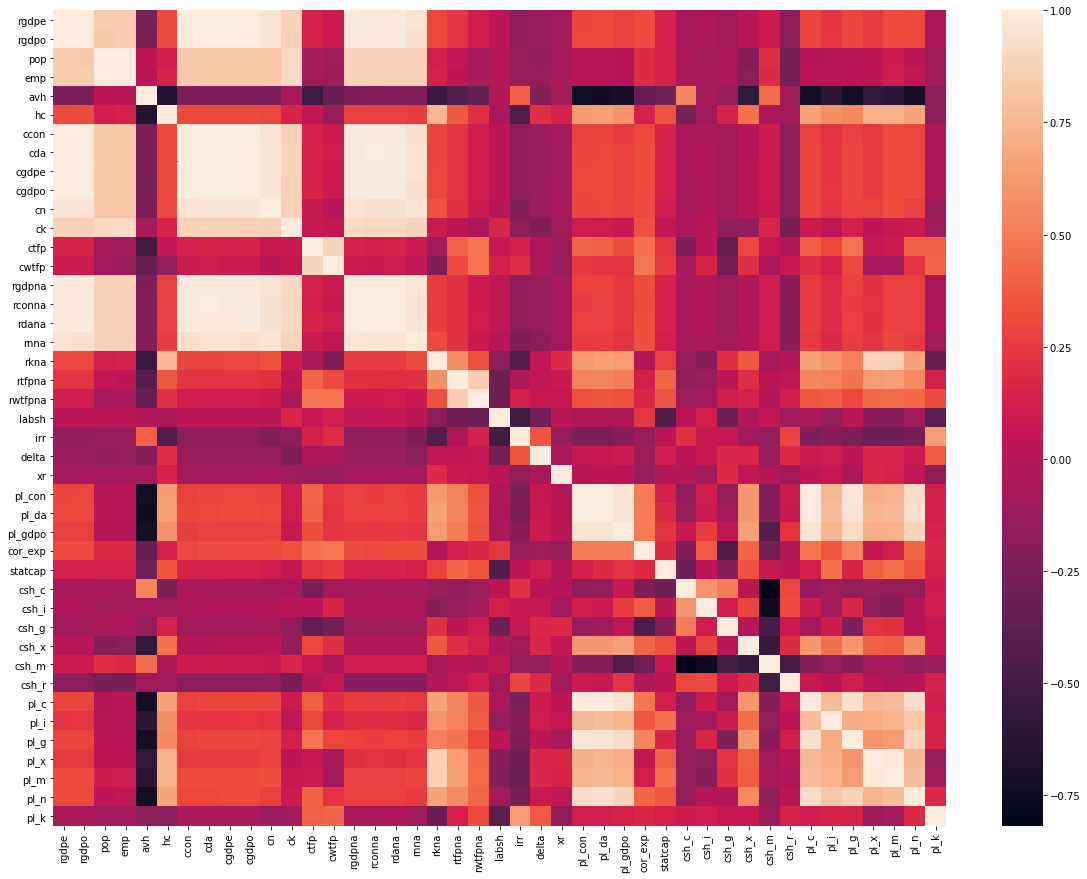

In [22]:
# sns.heatmap(df_test)
# data_penn_europe.head()
df = data_penn_europe.drop(['countrycode', 'country', 'year', 'i_cig', 'i_xm', 'i_xr', 'i_outlier', 'i_irr'], axis=1)
plt.figure(figsize=(20,15))
cor = df.corr()
sns.heatmap(cor) #annot=True

In [23]:
data_penn_europe_new = data_penn_europe.drop([
                  'ck','ctfp','cwtfp',
                  'rkna','rtfpna','rwtfpna',
                  'pl_con','pl_da','pl_gdpo',
                  'i_cig','i_xm','i_xr','i_outlier','i_irr','cor_exp','statcap',
                  'pl_c','pl_i','pl_g','pl_x','pl_m','pl_n','pl_k'
                 ], axis=1)
# statcap, cor_exp - missing data
# i_ - information variables
# the rest - variables with 2017=1
data_penn_europe_new.shape

(2730, 28)

In [24]:
total = data_penn_europe_new.isna().sum().sort_values(ascending=False) # how many missings in each column
percent = (data_penn_europe_new.isna().sum()/data_penn_europe_new.isna().count()).round(4).sort_values(ascending=False) # in %
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data.rename_axis('Column').reset_index()
missing_data
# avh !!!

,Column,Total,Percent
0,avh,1155,0.4231
1,hc,815,0.2985
2,irr,775,0.2839
3,rgdpna,695,0.2546
4,rconna,695,0.2546
5,csh_m,695,0.2546
6,csh_x,695,0.2546
7,csh_g,695,0.2546
8,csh_i,695,0.2546
9,csh_c,695,0.2546


In [25]:
# count of missings for each country, for each variable
data_penn_europe_new.drop('country', axis=1).isna().groupby(data_penn_europe_new.country, sort=False).sum().reset_index()
# 40s - Bosnia, Belarus, Czech Rep., Estonia, Croatia, Lithuania, Latvia, Moldova, Macedonia, Montenegro, Russian Fed., Serbia, Slovakia, Slovenia, Ukraine (15)
# 20s - Poland, Hungary, Bulgaria (3)
# total (39)

,country,countrycode,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,cgdpo,cn,rgdpna,rconna,rdana,rnna,labsh,irr,delta,xr,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r
0,Albania,0,0,20,20,20,20,70,20,20,20,20,20,20,20,20,20,20,70,70,20,20,20,20,20,20,20,20
1,Austria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Belgium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bulgaria,0,0,20,20,20,20,45,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
4,Bosnia and Herzegovina,0,0,40,40,40,40,70,70,40,40,40,40,40,40,40,40,40,20,40,40,40,40,40,40,40,40,40
5,Belarus,0,0,40,40,40,40,70,70,40,40,40,40,40,40,40,40,40,20,40,40,40,40,40,40,40,40,40
6,Switzerland,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Czech Republic,0,0,40,40,40,40,43,40,40,40,40,40,40,40,40,40,40,20,40,40,40,40,40,40,40,40,40
8,Germany,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Denmark,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

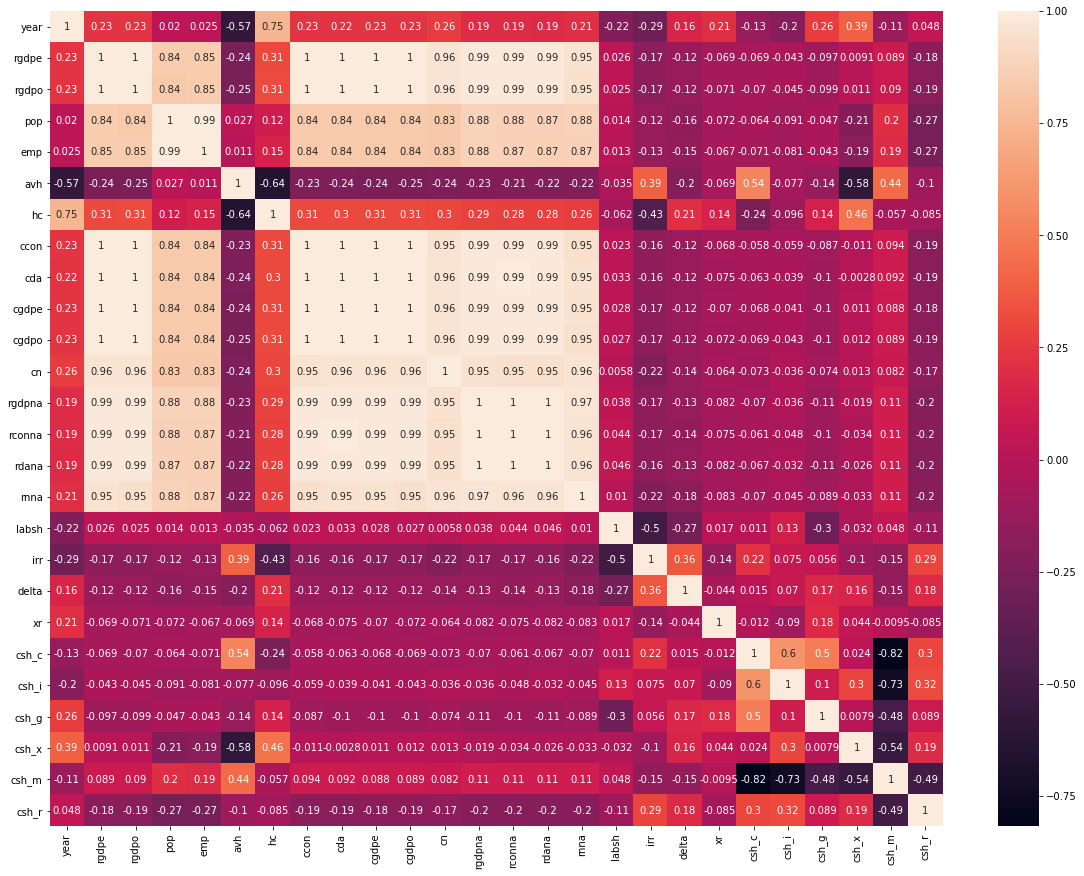

In [26]:
plt.figure(figsize=(20,15))
cor = data_penn_europe_new.corr()
sns.heatmap(cor, annot=True)

In [27]:
data_penn_correlation = data_penn_europe_new.drop(['ccon', 'cda', 'cn', 
        'rgdpe', 'rgdpo', 'cgdpe', 'cgdpo', # other GDPs, rgdpna left
        'rconna', 'rdana', 'rnna'], axis = 1) # dropping correlated vars 

In [28]:
# adding gdp per capita = rgdpna/pop
data_penn_correlation['rgdpna_per_cap'] = data_penn_correlation['rgdpna'] / data_penn_correlation['pop']
# adding percent of population working
data_penn_correlation['emp_percent'] = data_penn_correlation['emp'] / data_penn_correlation['pop'] * 100


<AxesSubplot:>

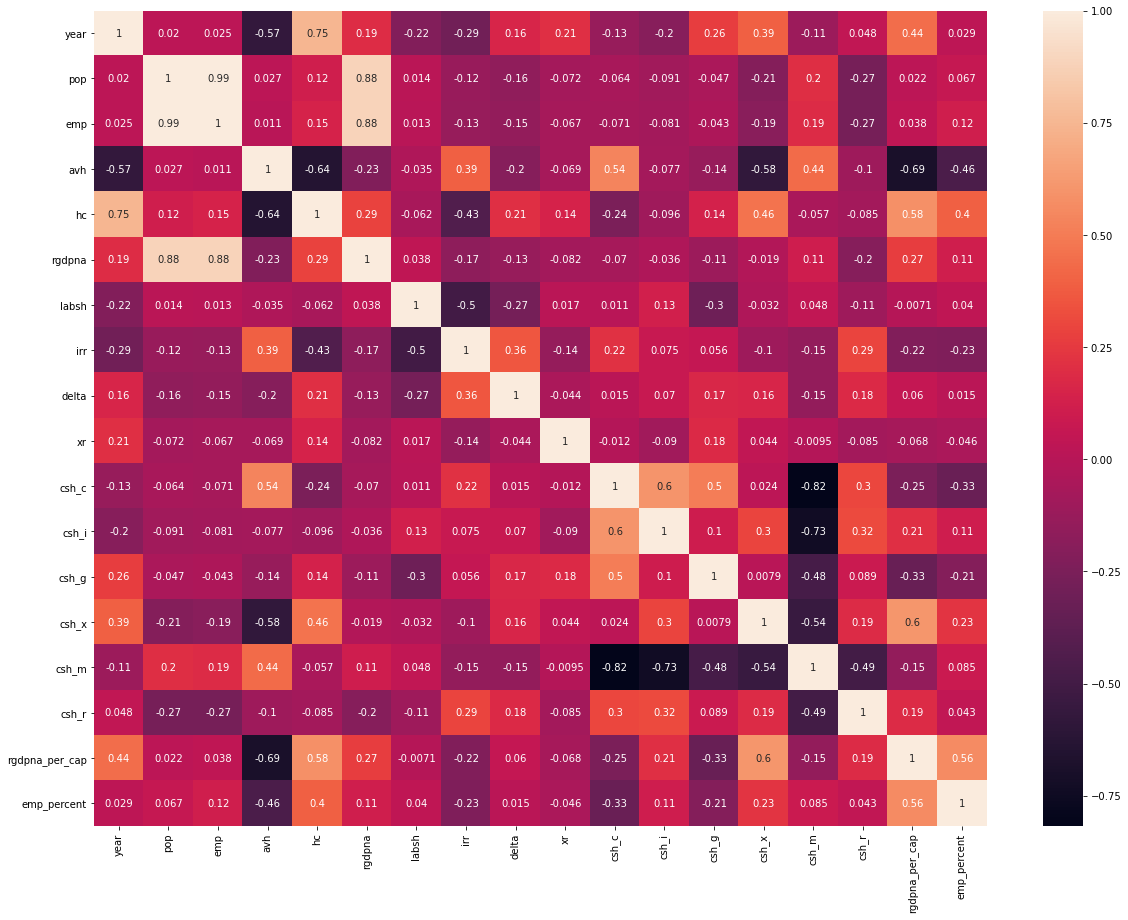

In [29]:
plt.figure(figsize=(20,15))
cor = data_penn_correlation.corr()
sns.heatmap(cor, annot=True)

In [30]:
# pop and emp correlation - create percentage? - done
# csh_ variables?
# avh?

In [31]:
data_penn_correlation.head()

,countrycode,country,year,pop,emp,avh,hc,rgdpna,labsh,irr,delta,xr,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,rgdpna_per_cap,emp_percent
210,ALB,Albania,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,ALB,Albania,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,ALB,Albania,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,ALB,Albania,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,ALB,Albania,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# missing values older then 1990
total_1990 = data_penn_correlation[data_penn_correlation['year'] >= 1990].isna().sum().sort_values(ascending=False) # how many missings in each column
percent_1990 = (data_penn_correlation[data_penn_correlation['year'] >= 1990].isna().sum()/data_penn_correlation[data_penn_correlation['year'] >= 1990].isna().count()).round(4).sort_values(ascending=False) # in %
missing_data_1990 = pd.concat([total_1990, percent_1990], axis=1, keys=['Total', 'Percent'])
missing_data_1990 = missing_data_1990.rename_axis('Column').reset_index()
missing_data_1990[missing_data_1990.Percent > 0]

,Column,Total,Percent
0,avh,289,0.2470
1,hc,120,0.1026
2,labsh,60,0.0513
3,irr,60,0.0513


## how to calculate variance and perform normalization !!!

In [33]:
data_penn_correlation.describe()

,year,pop,emp,avh,hc,rgdpna,labsh,irr,delta,xr,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,rgdpna_per_cap,emp_percent
count,2730.000000,2035.000000,2035.000000,1575.000000,1915.000000,2.035000e+03,2235.000000,1955.000000,2035.000000,2.035000e+03,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2.035000e+03,2035.000000,2035.000000
mean,1984.500000,18.476112,8.194387,1828.680053,2.798519,4.724998e+05,0.592462,0.084036,0.037650,1.040084e+01,0.604290,0.257389,0.199686,0.311622,-0.408316,3.532873e-02,25063.640309,43.658846
std,20.208899,26.059374,12.050175,227.289576,0.511580,7.692721e+05,0.077423,0.049893,0.009818,3.188239e+01,0.293025,0.109300,0.088420,0.232879,0.531818,8.686277e-02,16270.967382,7.330805
min,1950.000000,0.143164,0.065468,1380.607643,1.241877,6.695916e+02,0.316836,0.010000,0.020717,3.857142e-12,0.214789,0.004488,0.044929,0.002292,-17.068502,-2.321352e-01,1727.772878,4.323280
25%,1967.000000,3.701465,1.403216,1656.117357,2.487825,5.064288e+04,0.537072,0.052773,0.032006,7.193553e-01,0.528711,0.205081,0.148911,0.136595,-0.499294,-1.379044e-07,12693.273631,39.615685
50%,1984.500000,8.053002,3.490451,1827.734313,2.847474,1.798937e+05,0.594380,0.070163,0.035967,9.117255e-01,0.579292,0.256618,0.182277,0.244520,-0.332234,1.824851e-02,21554.448164,43.919549
75%,2002.000000,19.725127,9.287050,1987.153428,3.167833,4.314496e+05,0.642973,0.101303,0.040798,5.000000e+00,0.644819,0.298215,0.245414,0.448582,-0.188416,4.174024e-02,33235.261834,48.562496
max,2019.000000,148.373580,75.279228,2428.279448,3.849036,4.314068e+06,0.864418,0.327248,0.094306,2.906600e+02,10.526269,3.165007,2.111259,1.693886,-0.001920,5.720825e-01,96812.317524,74.815843


In [34]:
indicators = [name for name in data_penn_correlation.columns[4:]] 
for ind in indicators:
    df_test = data_penn_correlation[['country','year', ind]] #[['countrycode', 'country', 'currency_unit', 'year', ind]]
    df_test_transposed = df_test.pivot_table(index='country', #index=['countrycode','country','currency_unit'], columns=['year'], 
                                     columns=['year'], values=ind).reset_index()
    df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('country')
    scaler = MinMaxScaler()
    df_test_scaled = pd.DataFrame(scaler.fit_transform(df_test_final), columns=[df_test_final.columns])
    print(ind, ' STD: ', df_test_scaled.std(axis=1).mean())

    # df_test_final.T.plot(figsize=(20,10), title=ind)
df_test_scaled.head()

emp  STD:  0.02760610797248536
avh  STD:  0.09835855247152502
hc  STD:  0.060434785659795855
rgdpna  STD:  0.019589230356319796
labsh  STD:  0.13082339731414955
irr  STD:  0.12097637730306501
delta  STD:  0.0948926968111597
xr  STD:  0.07862133501298155
csh_c  STD:  0.18453379702903838
csh_i  STD:  0.19736279823716768
csh_g  STD:  0.16547800240743937
csh_x  STD:  0.09567206267838808
csh_m  STD:  0.12756888858728
csh_r  STD:  0.10161777672216343
rgdpna_per_cap  STD:  0.06683676754061156
emp_percent  STD:  0.13443498441453985


,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.270516,0.269056,0.267996,0.267768,0.272470,0.292885,0.298005,0.302652,0.306505,0.300833,0.296360,0.304054,0.368520,0.383382,0.404848,0.381206,0.366945,0.311214,0.332760,0.329912,0.406633,0.488626,0.487837,0.517114,0.584047,0.560516,0.479522,0.387438,0.344545,0.319101,0.315405,0.313104,0.314256,0.324906,0.333077,0.336327,0.334151,0.317430,0.274124,0.238854,0.239004,0.250221,0.270667,0.243377,0.242146,0.264798,0.299082,0.305880,0.315351,0.304886
1,0.256166,0.321997,0.284796,0.273467,0.591602,0.691222,0.723984,0.753525,0.800923,0.843116,0.789495,0.798791,0.784300,0.766143,0.754141,0.733159,0.707565,0.667186,0.658303,0.643126,0.625889,0.625555,0.616235,0.622695,0.647061,0.673666,0.686068,0.713368,0.725048,0.714727,0.714895,0.647395,0.606566,0.605654,0.613011,0.586455,0.548368,0.464524,0.524107,0.541048,0.605417,0.662387,0.771367,0.794431,0.803188,0.803641,0.786348,0.756652,0.729236,0.709384,0.681713,0.646986,0.626934,0.624860,0.619214,0.616148,0.610940,0.596410,0.583329,0.580940,0.586570,0.593245,0.599135,0.600226,0.598186,0.589574,0.584090,0.572046,0.565679,0.554705
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.756195,0.748919,0.811742,0.829909,0.819349,0.770342,0.738661,0.700907,0.680284,0.656915,0.628326,0.592095,0.576120,0.569311,0.564705,0.580341,0.579820,0.564526,0.557569,0.570116,0.584054,0.579203,0.566298,0.564403,0.556900,0.544096,0.520753,0.490560,0.472650,0.457256
3,0.137744,0.140653,0.143653,0.146748,0.452434,0.455989,0.437960,0.436952,0.435744,0.430364,0.422419,0.425113,0.436274,0.434312,0.438757,0.428096,0.420269,0.402374,0.405477,0.422800,0.405058,0.397958,0.374712,0.373665,0.390673,0.373013,0.352574,0.334339,0.325017,0.322702,0.299873,0.244264,0.245462,0.217116,0.244468,0.250021,0.228178,0.174401,0.208959,0.221895,0.348130,0.442918,0.612850,0.652135,0.657418,0.668682,0.629452,0.574639,0.556001,0.540076,0.530914,0.511270,0.498911,0.492529,0.493632,0.495464,0.486177,0.467878,0.451419,0.446814,0.444133,0.443388,0.442692,0.438878,0.434409,0.432343,0.430722,0.417676,0.409132,0.403354
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.323262,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## New data

In [35]:
unemployment = pd.read_csv('data/oecd/unempl.csv', low_memory = False)

# filter out locations
unemployment = unemployment[~unemployment.LOCATION.isin(['EA19','EU27_2020','G-7','OECD'])]
# unemployment.TIME = unemployment.TIME.str[:4].astype('int32')
unemployment = unemployment[unemployment.FREQUENCY == 'A'] # whether yearly or quaterly collected data
unemployment.TIME = unemployment.TIME.astype('int32')
unemployment = unemployment.drop(['INDICATOR', 'MEASURE', 'FREQUENCY', 'Flag Codes'], axis = 1).reset_index() # filter columns
# unemployment.groupby(['LOCATION', 'TIME'], as_index = False)['Value'].mean()                                         

# add continents to filter out Europe
alpha2 = pd.DataFrame([pc.country_alpha3_to_country_alpha2(code) for code in unemployment.LOCATION], columns = ['code'])
continents = pd.DataFrame([pc.country_alpha2_to_continent_code(code) for code in alpha2.code], columns=['continent'])
unemployment = unemployment[continents.continent == 'EU']

# len(set(unemployment.LOCATION))
tot = unemployment[unemployment.SUBJECT == 'TOT'].drop(['index', 'SUBJECT'], axis = 1).rename(columns={"Value": "Total"})
men = unemployment[unemployment.SUBJECT == 'MEN'].drop(['index', 'SUBJECT'], axis = 1).rename(columns={"Value": "Men"})
women = unemployment[unemployment.SUBJECT == 'WOMEN'].drop(['index', 'SUBJECT'], axis = 1).rename(columns={"Value": "Women"})

unemployment = tot.merge(men, on = ['LOCATION', 'TIME'], how='outer').merge(women, on = ['LOCATION', 'TIME'], how='outer')

In [36]:
unemployment = unemployment.sort_values(['LOCATION','TIME']).reset_index(drop=True)
unemployment.LOCATION.unique()


array(['AUT', 'BEL', 'CHE', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN',
       'FRA', 'GBR', 'GRC', 'HUN', 'IRL', 'ISL', 'ITA', 'LTU', 'LUX',
       'LVA', 'NLD', 'NOR', 'POL', 'PRT', 'SVK', 'SVN', 'SWE'],
      dtype=object)

In [37]:
employment_by_activity = pd.read_csv('data/oecd/empl_by_act.csv')

# same preprocessing
employment_by_activity = employment_by_activity[~employment_by_activity.LOCATION.isin(['EA19','EU27_2020','G-7','OECD'])]
employment_by_activity = employment_by_activity[employment_by_activity.FREQUENCY == 'A'] # annual data
employment_by_activity.TIME = employment_by_activity.TIME.astype('int32')
employment_by_activity = employment_by_activity.drop(['INDICATOR', 'MEASURE', 'FREQUENCY', 'Flag Codes'], axis = 1).reset_index()
    
# adding continent
alpha2 = pd.DataFrame([pc.country_alpha3_to_country_alpha2(code) for code in employment_by_activity.LOCATION], columns = ['code'])
continents = pd.DataFrame([pc.country_alpha2_to_continent_code(code) for code in alpha2.code], columns=['continent'])
employment_by_activity = employment_by_activity[continents.continent == 'EU']

# print(employment_by_activity)
# len(set(employment_by_activity.LOCATION))
agr = employment_by_activity[employment_by_activity.SUBJECT == 'AGR'].drop(['index', 'SUBJECT'], axis = 1).rename(columns={"Value": "Agr"})
constr = employment_by_activity[employment_by_activity.SUBJECT == 'CONSTR'].drop(['index', 'SUBJECT'], axis = 1).rename(columns={"Value": "Constr"})
ind = employment_by_activity[employment_by_activity.SUBJECT == 'INDUSCONSTR'].drop(['index', 'SUBJECT'], axis = 1).rename(columns={"Value": "Ind"})
mfg = employment_by_activity[employment_by_activity.SUBJECT == 'MFG'].drop(['index', 'SUBJECT'], axis = 1).rename(columns={"Value": "Mfg"})
serv = employment_by_activity[employment_by_activity.SUBJECT == 'SERV'].drop(['index', 'SUBJECT'], axis = 1).rename(columns={"Value": "Serv"})

employment_by_activity = agr.merge(constr, on = ['LOCATION', 'TIME'], how='outer'
                                  ).merge(ind, on = ['LOCATION', 'TIME'], how='outer'
                                         ).merge(mfg, on = ['LOCATION', 'TIME'], how='outer'
                                                ).merge(serv, on = ['LOCATION', 'TIME'], how='outer')

In [38]:
employment_by_activity = employment_by_activity.sort_values(['LOCATION','TIME']).reset_index(drop=True)
employment_by_activity

,LOCATION,TIME,Agr,Constr,Ind,Mfg,Serv
0,AUT,1956,920.000,NaN,NaN,NaN,NaN
1,AUT,1957,889.000,NaN,NaN,NaN,NaN
2,AUT,1958,865.000,NaN,NaN,NaN,NaN
3,AUT,1959,832.000,NaN,NaN,NaN,NaN
4,AUT,1960,796.000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
761,SWE,2016,92.025,328.000,887.850,501.000,3930.025
762,SWE,2017,91.450,342.325,907.625,507.300,4022.575
763,SWE,2018,87.875,348.575,922.225,510.650,4087.175
764,SWE,2019,86.225,360.500,940.200,513.500,4105.125


In [39]:
unemployment_by_education = pd.read_csv('data/oecd/unempl_by_edu.csv')

unemployment_by_education = unemployment_by_education[~unemployment_by_education.LOCATION.isin(['EA19','EU27_2020','G-7','OECD', 'OAVG', 'G20'])]
unemployment_by_education = unemployment_by_education[unemployment_by_education.FREQUENCY == 'A']
unemployment_by_education.TIME = unemployment_by_education.TIME.astype('int32')
unemployment_by_education = unemployment_by_education.drop(['INDICATOR', 'MEASURE', 'FREQUENCY', 'Flag Codes'], axis = 1).reset_index()
    
alpha2 = pd.DataFrame([pc.country_alpha3_to_country_alpha2(code) for code in unemployment_by_education.LOCATION], columns = ['code'])
continents = pd.DataFrame([pc.country_alpha2_to_continent_code(code) for code in alpha2.code], columns=['continent'])
unemployment_by_education = unemployment_by_education[continents.continent == 'EU']


# len(set(unemployment_by_education.LOCATION))

BUPPSRY = unemployment_by_education[unemployment_by_education.SUBJECT == 'BUPPSRY'].drop(['index', 'SUBJECT'], axis = 1).rename(columns={"Value": "BUPPSRY"})
TRY = unemployment_by_education[unemployment_by_education.SUBJECT == 'TRY'].drop(['index', 'SUBJECT'], axis = 1).rename(columns={"Value": "TRY"})
UPPSRY_NTRY = unemployment_by_education[unemployment_by_education.SUBJECT == 'UPPSRY_NTRY'].drop(['index', 'SUBJECT'], axis = 1).rename(columns={"Value": "UPPSRY_NTRY"})

unemployment_by_education = BUPPSRY.merge(TRY, on = ['LOCATION', 'TIME'], how='outer'
                                         ).merge(UPPSRY_NTRY, on = ['LOCATION', 'TIME'], how='outer')

In [40]:
unemployment_by_education = unemployment_by_education.sort_values(['LOCATION','TIME']).reset_index(drop=True)
unemployment_by_education

,LOCATION,TIME,BUPPSRY,TRY,UPPSRY_NTRY
0,AUT,2004,7.430773,3.286163,4.509399
1,AUT,2005,8.549712,2.952209,4.457380
2,AUT,2006,8.666804,2.846724,4.283933
3,AUT,2007,7.999064,2.578817,3.881003
4,AUT,2008,6.793232,2.109104,3.305689
...,...,...,...,...,...
648,SWE,2016,13.238413,3.783672,4.300498
649,SWE,2017,13.287424,3.873691,3.904453
650,SWE,2018,13.808542,3.527948,3.371035
651,SWE,2019,14.119621,3.496204,3.793934


(972, 13)


<AxesSubplot:>

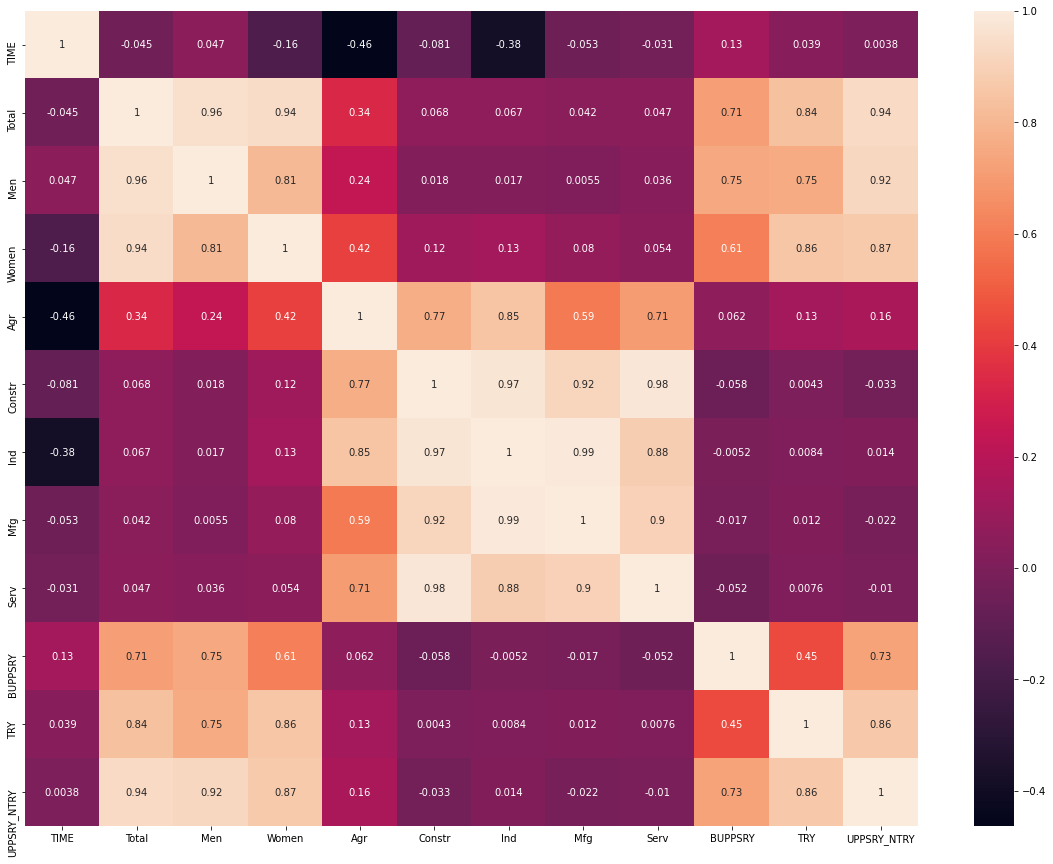

In [41]:
unemployment_corr = unemployment.merge(employment_by_activity, on = ['LOCATION', 'TIME'], how='outer'
                                      ).merge(unemployment_by_education, on = ['LOCATION', 'TIME'], how='outer')
print(unemployment_corr.shape)
plt.figure(figsize=(20,15))
sns.heatmap(unemployment_corr.corr(), annot=True)

In [42]:
unemployment_corr.LOCATION.unique() # 27
unemployment_corr.TIME.sort_values().unique() # 1956-2020
unemployment_corr[unemployment_corr.TIME >= 1990] # 769 records
unemployment_corr.isna().sum(axis=0)

LOCATION         0
TIME             0
Total          191
Men            191
Women          191
Agr            250
Constr         377
Ind            304
Mfg            441
Serv           355
BUPPSRY        319
TRY            320
UPPSRY_NTRY    319
dtype: int64

In [43]:
working_age = pd.read_csv('data/oecd/working_age.csv')
young = pd.read_csv('data/oecd/young.csv')
old = pd.read_csv('data/oecd/old.csv')

In [44]:
working_age.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,WKGPOP,TOT,PC_POP,A,1950,65.282991,NaN
1,AUS,WKGPOP,TOT,PC_POP,A,1951,64.736336,NaN
2,AUS,WKGPOP,TOT,PC_POP,A,1952,64.263301,NaN
3,AUS,WKGPOP,TOT,PC_POP,A,1953,63.648429,NaN
4,AUS,WKGPOP,TOT,PC_POP,A,1954,63.086853,NaN


In [45]:
set(working_age.INDICATOR)

{'WKGPOP'}

In [46]:
working_age = working_age[~working_age.LOCATION.isin(['EA19','EU27_2020','G-7','OECD', 'OAVG', 'G20', 'EU27', 'WLD'])]
working_age = working_age[working_age.FREQUENCY == 'A']
working_age.TIME = working_age.TIME.astype('int32')
working_age = working_age.drop(['INDICATOR', 'MEASURE', 'FREQUENCY', 'SUBJECT', 'Flag Codes'], axis = 1).reset_index(drop=True)
    
alpha2 = pd.DataFrame([pc.country_alpha3_to_country_alpha2(code) for code in working_age.LOCATION], columns = ['code'])
continents = pd.DataFrame([pc.country_alpha2_to_continent_code(code) for code in alpha2.code], columns=['continent'])
working_age = working_age[continents.continent == 'EU']
working_age = working_age.rename(columns={'Value':'Working'}).reset_index(drop=True)
working_age.head()

,LOCATION,TIME,Working
0,AUT,1950,66.793817
1,AUT,1951,66.471149
2,AUT,1952,66.112337
3,AUT,1953,65.811889
4,AUT,1954,65.864760


In [47]:
young = young[~young.LOCATION.isin(['EA19','EU27_2020','G-7','OECD', 'OAVG', 'G20', 'EU27', 'WLD'])]
young = young[young.FREQUENCY == 'A']
young.TIME = young.TIME.astype('int32')
young = young.drop(['INDICATOR', 'MEASURE', 'FREQUENCY', 'SUBJECT', 'Flag Codes'], axis = 1).reset_index(drop=True)
    
alpha2 = pd.DataFrame([pc.country_alpha3_to_country_alpha2(code) for code in young.LOCATION], columns = ['code'])
continents = pd.DataFrame([pc.country_alpha2_to_continent_code(code) for code in alpha2.code], columns=['continent'])
young = young[continents.continent == 'EU']
young = young.rename(columns={'Value':'Young'}).reset_index(drop=True)
young.head()

,LOCATION,TIME,Young
0,AUT,1950,22.763594
1,AUT,1951,22.915410
2,AUT,1952,23.033307
3,AUT,1953,23.125697
4,AUT,1954,22.879239


In [48]:
old = old[~old.LOCATION.isin(['EA19','EU27_2020','G-7','OECD', 'OAVG', 'G20', 'EU27', 'WLD'])]
old = old[old.FREQUENCY == 'A']
old.TIME = old.TIME.astype('int32')
old = old.drop(['INDICATOR', 'MEASURE', 'FREQUENCY', 'SUBJECT', 'Flag Codes'], axis = 1).reset_index(drop=True)
    
alpha2 = pd.DataFrame([pc.country_alpha3_to_country_alpha2(code) for code in old.LOCATION], columns = ['code'])
continents = pd.DataFrame([pc.country_alpha2_to_continent_code(code) for code in alpha2.code], columns=['continent'])
old = old[continents.continent == 'EU']
old = old.rename(columns={'Value':'Old'}).reset_index(drop=True)
old.head()

,LOCATION,TIME,Old
0,AUT,1950,10.442589
1,AUT,1951,10.613441
2,AUT,1952,10.854355
3,AUT,1953,11.062414
4,AUT,1954,11.256001


In [49]:
age_groups = young.merge(working_age, on = ['LOCATION', 'TIME'], how='outer'
                                         ).merge(old, on = ['LOCATION', 'TIME'], how='outer')
age_groups

,LOCATION,TIME,Young,Working,Old
0,AUT,1950,22.763594,66.793817,10.442589
1,AUT,1951,22.915410,66.471149,10.613441
2,AUT,1952,23.033307,66.112337,10.854355
3,AUT,1953,23.125697,65.811889,11.062414
4,AUT,1954,22.879239,65.864760,11.256001
...,...,...,...,...,...
2196,ROU,2016,15.546215,66.864222,17.589564
2197,ROU,2017,15.616330,66.401687,17.981984
2198,ROU,2018,15.649386,65.996480,18.354134
2199,ROU,2019,15.676460,65.586004,18.737536


In [54]:
# calculate gdp per capita - done (in the section of penn data)

### HDI

In [231]:
hdi = pd.read_csv('data/other/Human_Development_Index.csv', skiprows=5, encoding = 'cp1252')
# dropping unnecessary empty columns & Na in HDI rank
hdi = hdi.dropna(how='all', axis='columns').dropna(how='all', axis='rows').dropna(subset=['HDI Rank'], axis=0)
# removing unnecessary space
hdi.Country = hdi.Country.str.strip()
hdi['Country'] = hdi['Country'].str.split(' \(').str[0] # brackets
hdi = hdi[hdi['HDI Rank'] != ' '] # regions
# changing wrong names of countries
hdi.loc[hdi.Country=='Hong Kong, China', 'Country'] = 'Hong Kong'
hdi = hdi[hdi.Country != 'Korea'].reset_index(drop=True)
# hdi.loc[hdi.Country=='Congo (Democratic Republic of the)', 'Country'] = 'Congo'
hdi = hdi.drop(['HDI Rank'], axis=1)
hdi = hdi.replace('..', np.NaN) # missings

# assigning country codes
alpha3 = pd.DataFrame([pc.country_name_to_country_alpha3(country) for country in hdi.Country], columns = ['Code'])
hdi['countrycode'] = alpha3


In [233]:
alpha2 = pd.DataFrame([pc.country_alpha3_to_country_alpha2(code) for code in hdi.countrycode], columns = ['Code'])
alpha2.loc[alpha2.Code=='TL', 'Code'] = 'ID' # changing Timor to Indonesia, to be deleted anyway
continents = pd.DataFrame([pc.country_alpha2_to_continent_code(code) for code in alpha2.Code], columns=['continent'])
hdi_europe = hdi[continents.continent == 'EU'].reset_index(drop=True)

hdi_europe.drop(['Country'], axis = 1, inplace = True)
hdi_europe = hdi_europe.melt(id_vars='countrycode', var_name='year', value_name='hdi')
hdi_europe = hdi_europe.astype({'year':'int64'})

In [271]:
temp = hdi_europe.drop('countrycode', 1).isna().groupby(hdi_europe.countrycode, sort=False).sum().reset_index()
temp[temp.hdi>0]
# http://hdr.undp.org/en/indicators/137506 - link do danych 

,countrycode,year,hdi
1,AND,0,10
3,BLR,0,5
5,BIH,0,10
20,LIE,0,10
25,MNE,0,16
27,MKD,0,10


## Eurostat

In [236]:
migration = pd.read_excel('data/eurostat/migration.xlsx', sheet_name='Sheet 1', skiprows=10, skipfooter=10)
migration.drop(index = 0, axis=1, inplace=True)
migration.drop(list(migration.filter(regex='Unnamed')), axis = 1, inplace=True)

migration = migration.melt(id_vars='TIME', var_name='year', value_name='immigration')
migration.TIME = migration.TIME.replace({'Germany (until 1990 former territory of the FRG)':'Germany'})
migration.columns = ['country', 'year', 'immigration']

alpha3 = pd.DataFrame([pc.country_name_to_country_alpha3(country) for country in migration.country], columns = ['Code'])
migration['countrycode'] = alpha3
migration.drop('country', axis = 1, inplace= True)
migration = migration.astype({'year':'int64'})

migration.head()


C:\Users\agama\anaconda3\envs\course\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,year,immigration,countrycode
0,1990,62662,BEL
1,1990,:,BGR
2,1990,:,CZE
3,1990,40715,DNK
4,1990,1256250,DEU


In [302]:
list_of_countries = []
for x in pycountry.countries:
    list_of_countries.append(x.alpha_3)

In [323]:
emp_industry = pd.read_csv('data/worldbank/emp_industry.csv', skiprows = 4)
emp_industry = emp_industry.dropna(how='all', axis='columns')
emp_industry.drop(['Country Name', 'Indicator Name', 'Indicator Code'], axis = 1, inplace=True)

emp_industry = emp_industry[emp_industry['Country Code'].isin(list_of_countries)].reset_index(drop=True)

alpha2 = pd.DataFrame([pc.country_alpha3_to_country_alpha2(code) for code in emp_industry['Country Code']], columns = ['Code'])
alpha2.loc[alpha2.Code=="SX", 'Code'] = 'MF' # dutch part to french
alpha2.loc[alpha2.Code=='TL', 'Code'] = 'ID' # changing Timor to Indonesia, to be deleted anyway
continents = pd.DataFrame([pc.country_alpha2_to_continent_code(code) for code in alpha2.Code], columns=['continent'])
emp_industry_europe = emp_industry[continents.continent == 'EU'].reset_index(drop=True)

emp_industry_europe = emp_industry_europe.melt(id_vars='Country Code', var_name='year', value_name='emp_industry')
emp_industry_europe.head()

emp_industry_europe[emp_industry_europe.year >= '1990']

,Country Code,year,emp_industry
0,ALB,1991,11.580000
1,AND,1991,NaN
2,AUT,1991,33.840000
3,BEL,1991,31.209999
4,BGR,1991,41.119999
...,...,...,...
1329,SRB,2019,27.430000
1330,SVK,2019,36.090000
1331,SVN,2019,34.099998
1332,SWE,2019,18.420000


In [328]:
temp = emp_industry_europe.drop('Country Code', 1).isna().groupby(emp_industry_europe['Country Code'], sort=False).sum().reset_index()
temp[temp.emp_industry>0]

,Country Code,year,emp_industry
1,AND,0,29
15,FRO,0,29
17,GIB,0,29
21,IMN,0,29
25,LIE,0,29
29,MCO,0,29
40,SMR,0,29


## Selected Data

In [255]:
# data_penn_correlation, unemployment_corr, age_groups, hdi_europe, migration

unemployment_corr.columns = ['countrycode', 'year', 'Total', 'Men', 'Women', 'Agr', 'Constr', 'Ind',
                             'Mfg', 'Serv', 'BUPPSRY', 'TRY', 'UPPSRY_NTRY']
age_groups.columns = ['countrycode', 'year', 'Young', 'Working', 'Old']

data = data_penn_correlation.merge(unemployment_corr, on = ['countrycode', 'year'], how='outer'
                                  ).merge(age_groups, on = ['countrycode', 'year'], how='outer'
                                  ).merge(hdi_europe, on = ['countrycode', 'year'], how='outer'
                                  ).merge(migration, on = ['countrycode', 'year'], how='outer')
        
# data.drop(columns = ['Entity'], inplace = True)
data = data[data.year >= 1990]
print(data.shape)
data.head()

(1291, 36)


,countrycode,country,year,pop,emp,avh,hc,rgdpna,labsh,irr,delta,xr,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,rgdpna_per_cap,emp_percent,Total,Men,Women,Agr,Constr,Ind,Mfg,Serv,BUPPSRY,TRY,UPPSRY_NTRY,Young,Working,Old,hdi,immigration
40,ALB,Albania,1990,3.286073,1.324078,NaN,2.516159,15105.708008,NaN,NaN,0.029161,7.562970,0.856953,0.106055,0.149501,0.042011,-0.039518,-0.115001,4596.887533,40.293633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.650,NaN
41,ALB,Albania,1991,3.280395,1.317463,NaN,2.515733,10875.786133,NaN,NaN,0.028644,9.913647,0.830647,0.024768,0.251147,0.048235,-0.098372,-0.056425,3315.389193,40.161709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.631,NaN
42,ALB,Albania,1992,3.245886,1.052518,NaN,2.515308,10094.130859,NaN,NaN,0.027829,32.275396,1.149852,0.019641,0.252175,0.053268,-0.242801,-0.232135,3109.822976,32.426220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.615,NaN
43,ALB,Albania,1993,3.195199,0.991653,NaN,2.514883,11059.070312,NaN,NaN,0.027229,71.144097,0.993673,0.054909,0.196970,0.035555,-0.172263,-0.108844,3461.152283,31.035730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.618,NaN
44,ALB,Albania,1994,3.146519,1.068879,NaN,2.514457,11977.291016,NaN,NaN,0.026968,94.623333,0.859124,0.077424,0.208649,0.028667,-0.111053,-0.062811,3806.521116,33.970203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.624,NaN


In [256]:
data.columns

Index(['countrycode', 'country', 'year', 'pop', 'emp', 'avh', 'hc', 'rgdpna',
       'labsh', 'irr', 'delta', 'xr', 'csh_c', 'csh_i', 'csh_g', 'csh_x',
       'csh_m', 'csh_r', 'rgdpna_per_cap', 'emp_percent', 'Total', 'Men',
       'Women', 'Agr', 'Constr', 'Ind', 'Mfg', 'Serv', 'BUPPSRY', 'TRY',
       'UPPSRY_NTRY', 'Young', 'Working', 'Old', 'hdi', 'immigration'],
      dtype='object')

In [264]:
len(set(data.countrycode)) # all 44 - https://www.worldometers.info/geography/how-many-countries-in-europe/

42

In [265]:
len(set(data.year)) # 1990 - 2020

31

In [266]:
data.isna().sum(axis=0).sort_values()

countrycode         0
year                0
emp_percent       121
rgdpna_per_cap    121
csh_m             121
csh_x             121
csh_g             121
csh_i             121
csh_c             121
xr                121
csh_r             121
rgdpna            121
delta             121
emp               121
pop               121
country           121
hdi               122
irr               181
labsh             181
hc                241
immigration       271
Young             330
Working           330
Old               330
avh               410
Men               586
Women             586
Total             586
BUPPSRY           656
UPPSRY_NTRY       656
TRY               657
Agr               671
Ind               704
Constr            706
Serv              723
Mfg               760
dtype: int64

In [267]:
data[data.country.isna()]
# data[(data.country.isna()) & (data.year != 2020) & (data.countrycode != 'LIE')] # 18 missing for Andora
# data[(data.country.isna()) & (data.countrycode == 'LIE')] # 18 missing for Liechtenstein
# data[(data.country.isna()) & (data.year == 2020)].shape # 31 countries missing 2020 data

data = data[data.countrycode != 'LIE']
data = data[data.countrycode != 'AND']

<AxesSubplot:>

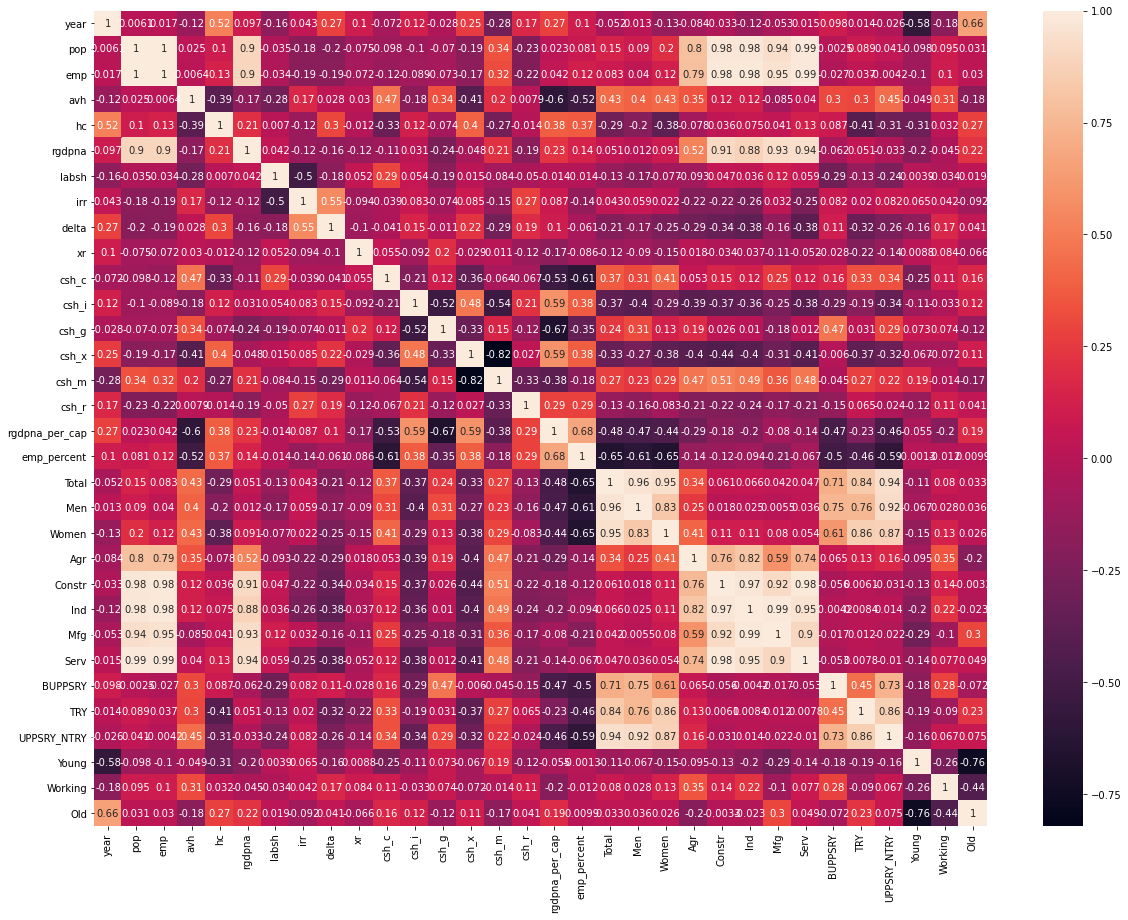

In [268]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True)